In [ ]:
# sentiment analysis

In [ ]:
# Importing Libraries

from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
import seaborn as sns


from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer


from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import tensorflow as tf
import tensorflow_hub as hub
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# tweets = pd.read_csv('/content/tweets.csv')
# tweets.head()

In [ ]:
# tweets.info()

In [ ]:
# for col in tweets.columns:
#     prct_nan = 'column: {:>10}\t Percent NaN: {:.2f}%'.format(col,100*(tweets[col].isnull().sum()/tweets[col].shape[0]))
#     print(prct_nan)

# Loading the data


In [ ]:
tweets = pd.read_csv('/tweets.csv')
tweets.head()

id      conversation_id               created_at  \
0  1630366235354451969  1630152070530576385  2023-02-28 00:36:15 UTC   
1  1630366226424778753  1630366226424778753  2023-02-28 00:36:13 UTC   
2  1630366225930027011  1630366225930027011  2023-02-28 00:36:13 UTC   
3  1630366223056662530  1630351686974992385  2023-02-28 00:36:12 UTC   
4  1630366221483884545  1629903982255644672  2023-02-28 00:36:12 UTC   

         date      time  timezone              user_id     username  \
0  2023-02-28  00:36:15         0  1493761817406894086  tomasliptai   
1  2023-02-28  00:36:13         0  1526694166662721536  paperfloure   
2  2023-02-28  00:36:13         0  1053018392939167746    katetbar1   
3  2023-02-28  00:36:12         0            602371247    jlhrdhmom   
4  2023-02-28  00:36:12         0  1053594763214184448    phemikali   

                  name place  ... geo source user_rt_id user_rt retweet_id  \
0         Tomas Liptai   NaN  ... NaN    NaN        NaN     NaN        NaN   
1      Smell the roses   NaN  ... NaN    NaN        NaN     NaN        NaN   
2                @etak   NaN  ... NaN    NaN        NaN     NaN        NaN   
3               JLHrdh   NaN  ... NaN    NaN        NaN     NaN        NaN   
4  rolarkcybersecurity   NaN  ... NaN    NaN        NaN     NaN        NaN   

                                            reply_to  retweet_date  translate  \
0  [{'screen_name': 'nazijaeger__', 'name': 'nazi...           NaN        NaN   
1                                                 []           NaN        NaN   
2                                                 []           NaN        NaN   
3  [{'screen_name': 'MainelifeR', 'name': 'Mainel...           NaN        NaN   
4  [{'screen_name': 'Pottingpinks', 'name': 'GRS'...           NaN        NaN   

  trans_src trans_dest  
0       NaN        NaN  
1       NaN        NaN  
2       NaN        NaN  
3       NaN        NaN  
4       NaN        NaN  

[5 rows x 36 columns]

## Explore & Clean

In [ ]:
tweets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10014 non-null  int64  
 1   conversation_id  10014 non-null  int64  
 2   created_at       10014 non-null  object 
 3   date             10014 non-null  object 
 4   time             10014 non-null  object 
 5   timezone         10014 non-null  int64  
 6   user_id          10014 non-null  int64  
 7   username         10014 non-null  object 
 8   name             10014 non-null  object 
 9   place            3 non-null      object 
 10  tweet            10014 non-null  object 
 11  language         10014 non-null  object 
 12  mentions         10014 non-null  object 
 13  urls             10014 non-null  object 
 14  photos           10014 non-null  object 
 15  replies_count    10014 non-null  int64  
 16  retweets_count   10014 non-null  int64  
 17  likes_count 

In [ ]:
# droppingduplicates
tweets.drop_duplicates(inplace=True)

In [ ]:
tweets.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [ ]:
# Drop nulls if any
tweets.isnull().sum()

id                     0
conversation_id        0
created_at             0
date                   0
time                   0
timezone               0
user_id                0
username               0
name                   0
place              10011
tweet                  0
language               0
mentions               0
urls                   0
photos                 0
replies_count          0
retweets_count         0
likes_count            0
hashtags               0
cashtags               0
link                   0
retweet                0
quote_url           9235
video                  0
thumbnail           8927
near               10014
geo                10014
source             10014
user_rt_id         10014
user_rt            10014
retweet_id         10014
reply_to               0
retweet_date       10014
translate          10014
trans_src          10014
trans_dest         10014
dtype: int64

## Tweet processing


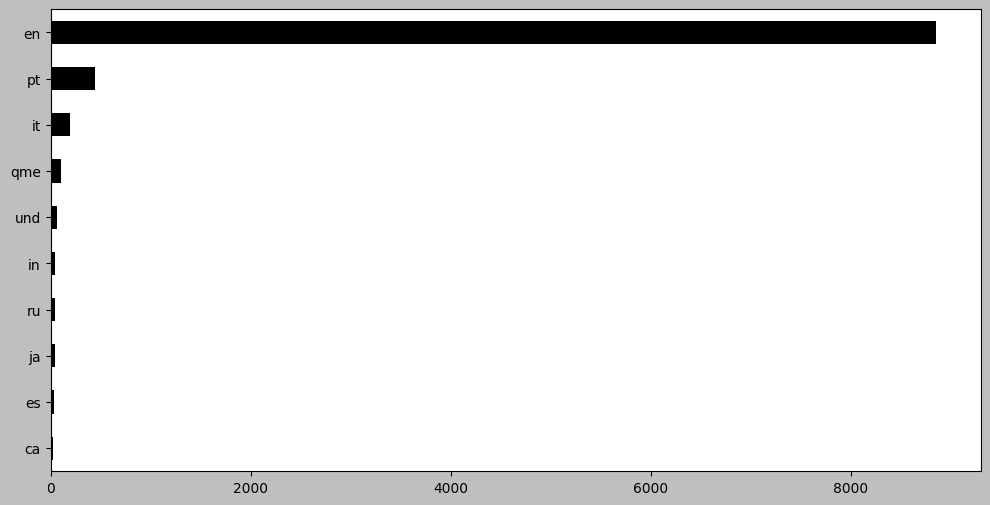

In [ ]:
# Choosing languge with most tweets to perform the anaylsis?
tweets["language"].value_counts()

top10_languages = tweets['language'].value_counts().head(10)
plt.style.use('grayscale')
top10_languages.sort_values(ascending=True).plot(kind='barh',figsize=(12,6));


In [ ]:
tweets.head()

id      conversation_id               created_at  \
0  1630366235354451969  1630152070530576385  2023-02-28 00:36:15 UTC   
1  1630366226424778753  1630366226424778753  2023-02-28 00:36:13 UTC   
2  1630366225930027011  1630366225930027011  2023-02-28 00:36:13 UTC   
3  1630366223056662530  1630351686974992385  2023-02-28 00:36:12 UTC   
4  1630366221483884545  1629903982255644672  2023-02-28 00:36:12 UTC   

         date      time  timezone              user_id     username  \
0  2023-02-28  00:36:15         0  1493761817406894086  tomasliptai   
1  2023-02-28  00:36:13         0  1526694166662721536  paperfloure   
2  2023-02-28  00:36:13         0  1053018392939167746    katetbar1   
3  2023-02-28  00:36:12         0            602371247    jlhrdhmom   
4  2023-02-28  00:36:12         0  1053594763214184448    phemikali   

                  name place  ... geo source user_rt_id user_rt retweet_id  \
0         Tomas Liptai   NaN  ... NaN    NaN        NaN     NaN        NaN   
1      Smell the roses   NaN  ... NaN    NaN        NaN     NaN        NaN   
2                @etak   NaN  ... NaN    NaN        NaN     NaN        NaN   
3               JLHrdh   NaN  ... NaN    NaN        NaN     NaN        NaN   
4  rolarkcybersecurity   NaN  ... NaN    NaN        NaN     NaN        NaN   

                                            reply_to  retweet_date  translate  \
0  [{'screen_name': 'nazijaeger__', 'name': 'nazi...           NaN        NaN   
1                                                 []           NaN        NaN   
2                                                 []           NaN        NaN   
3  [{'screen_name': 'MainelifeR', 'name': 'Mainel...           NaN        NaN   
4  [{'screen_name': 'Pottingpinks', 'name': 'GRS'...           NaN        NaN   

  trans_src trans_dest  
0       NaN        NaN  
1       NaN        NaN  
2       NaN        NaN  
3       NaN        NaN  
4       NaN        NaN  

[5 rows x 36 columns]

In [ ]:
tweets.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [ ]:
# Tweet processing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def process_tweet(tweet):
    tweet = tweet.lower()  # Convert to lowercase
    tweet = ''.join([char for char in tweet if char not in string.punctuation])  # Remove punctuation
    tokens = word_tokenize(tweet)  # Tokenization
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    tokens = [stemmer.stem(word) for word in tokens]  # Stemming
    processed_tweet = ' '.join(tokens)  # Join tokens back to sentence
    return processed_tweet

tweets['processed_tweet'] = tweets['tweet'].apply(process_tweet)


### **Most Frequently Used Words**

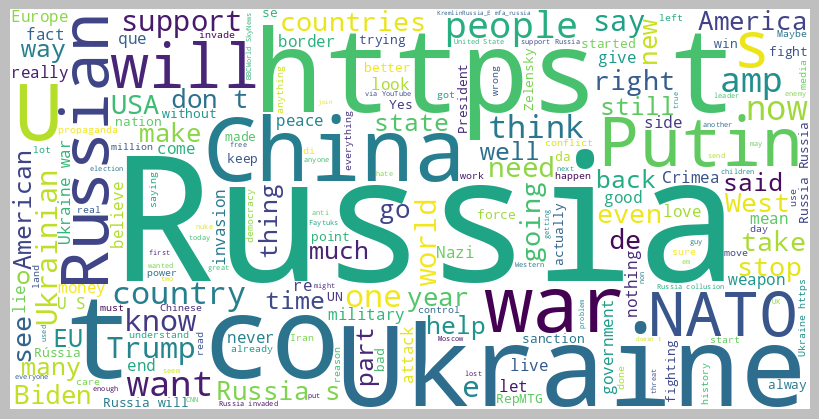

In [ ]:
# join all tweets into a single string
all_tweets = ' '.join(tweets['tweet'].tolist())

# generate wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# plot the WordCloud image
plt.figure(figsize=(8, 4), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

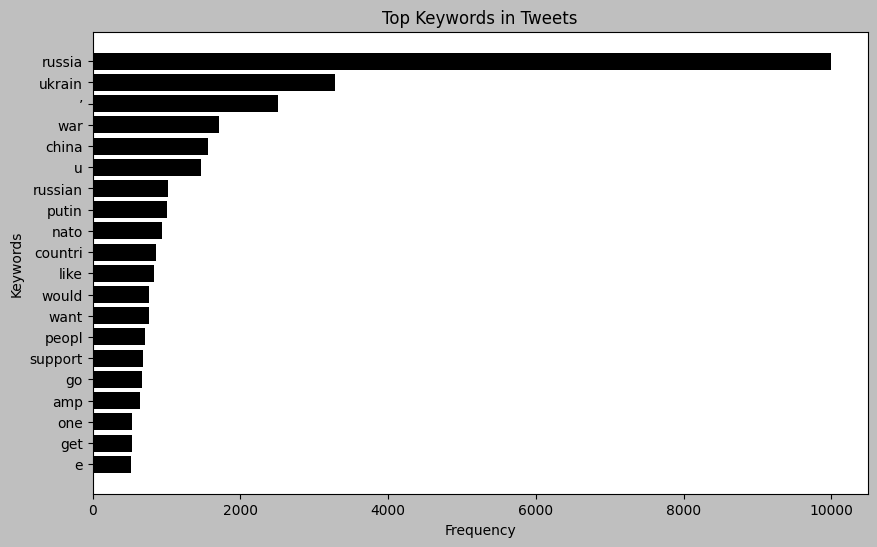

In [ ]:
# Bar Graph

# Tokenize and preprocess the text to extract keywords
keywords = ' '.join(tweets['processed_tweet']).split()
keyword_counts = Counter(keywords)

# Get the top N keywords
top_n = 20
top_keywords = keyword_counts.most_common(top_n)

# Plot a bar chart
top_keywords, top_counts = zip(*top_keywords)
plt.figure(figsize=(10, 6))
plt.barh(top_keywords, top_counts)
plt.xlabel('Frequency')
plt.ylabel('Keywords')
plt.title('Top Keywords in Tweets')
plt.gca().invert_yaxis()
plt.show()


## Sentiment Analysis


In [ ]:
tweets = tweets[["username", "tweet", "language", "created_at"]]


In [ ]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
tweets["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in tweets["tweet"]]
tweets["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in tweets["tweet"]]
tweets["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in tweets["tweet"]]
tweets = tweets[["tweet", "Positive", "Negative", "Neutral"]]
print(tweets.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                               tweet  Positive  Negative  \
0  @nazijaeger__ @derwener @Anonymous9775 Russia ...     0.189     0.000   
1  The Russia HAARP which could destroy USA in on...     0.000     0.308   
2  Putin gives Steven Seagal Russia&amp;#8217;s O...     0.266     0.000   
3  @MainelifeR @BaddCompani It’s ALWAYS PROJECTIO...     0.000     0.000   
4  @Pottingpinks @mfa_russia @mod_russia @mil_his...     0.043     0.074   

   Neutral  
0    0.811  
1    0.692  
2    0.734  
3    1.000  
4    0.883  


### Positive Sentiments

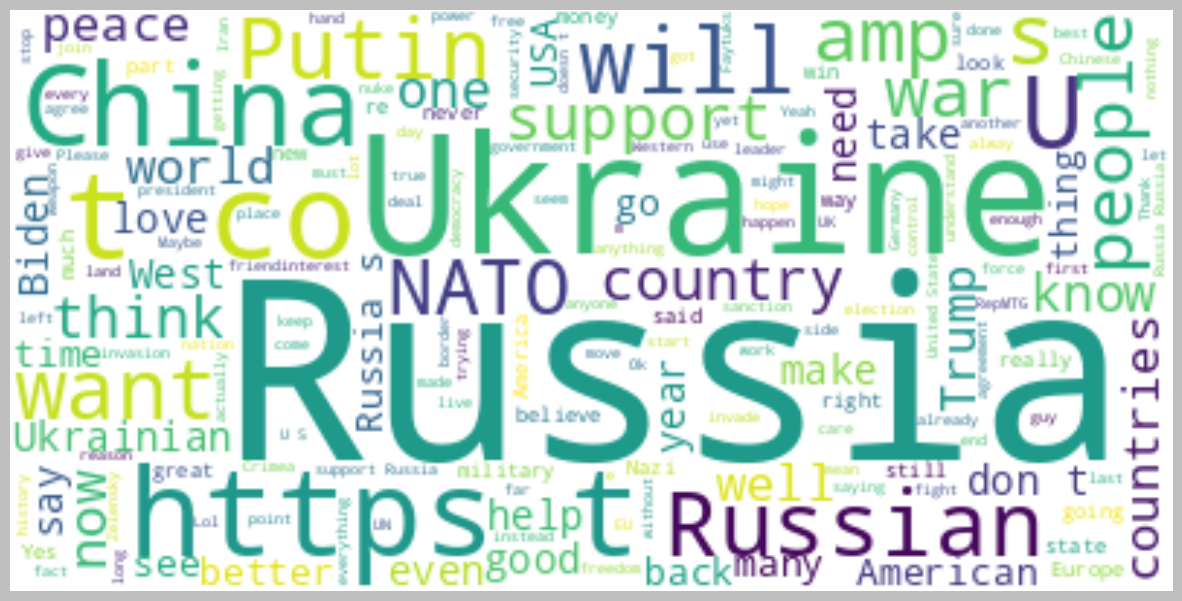

In [ ]:
# Most frequent words used by people with positive sentiments

positive =' '.join([i for i in tweets['tweet'][tweets['Positive'] > tweets["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Negative Sentiments

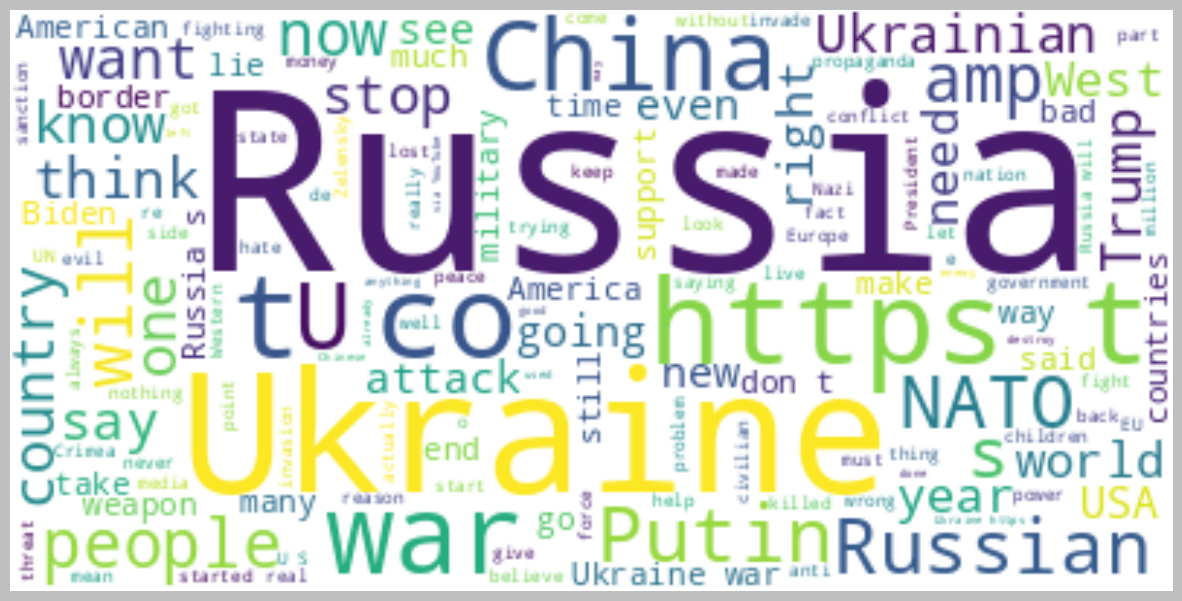

In [ ]:
negative =' '.join([i for i in tweets['tweet'][tweets['Negative'] > tweets["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Neutral Sentiments

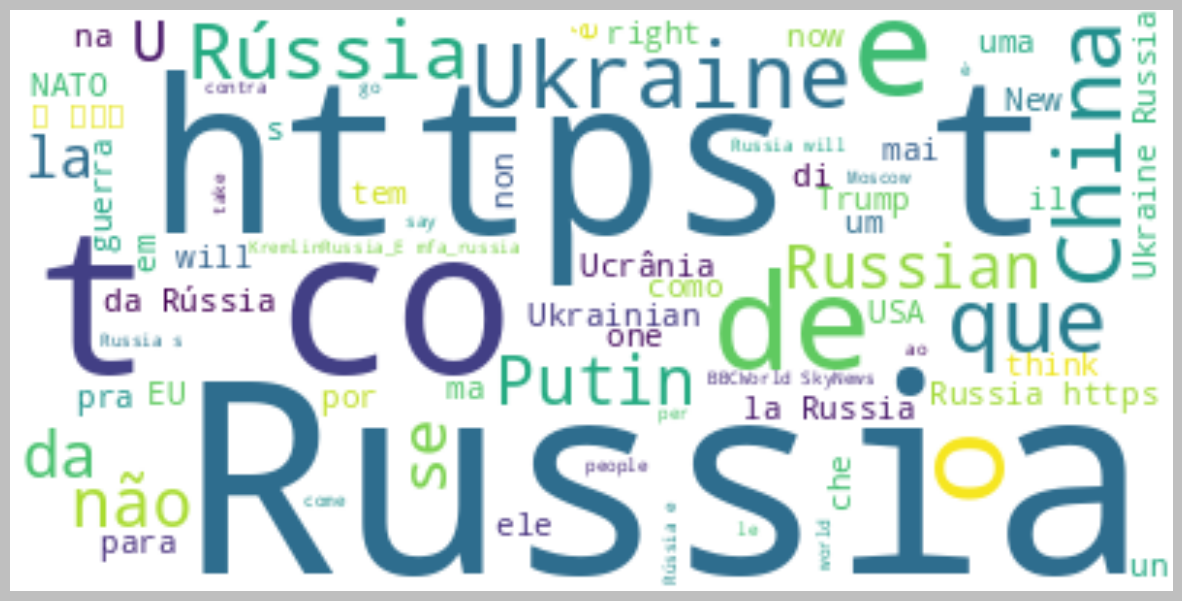

In [ ]:
# Define a condition to filter neutral tweets (adjust as needed)
neutral_condition = (tweets['Negative'] <= 0) & (tweets['Positive'] <= 0)

# Join the neutral tweets into a single string
neutral_tweets = ' '.join(tweets['tweet'][neutral_condition])

# Create a WordCloud for the neutral tweets
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(neutral_tweets)

# Display the WordCloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Timeline of positive and negative words for each day in "daily tweets" dataset


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


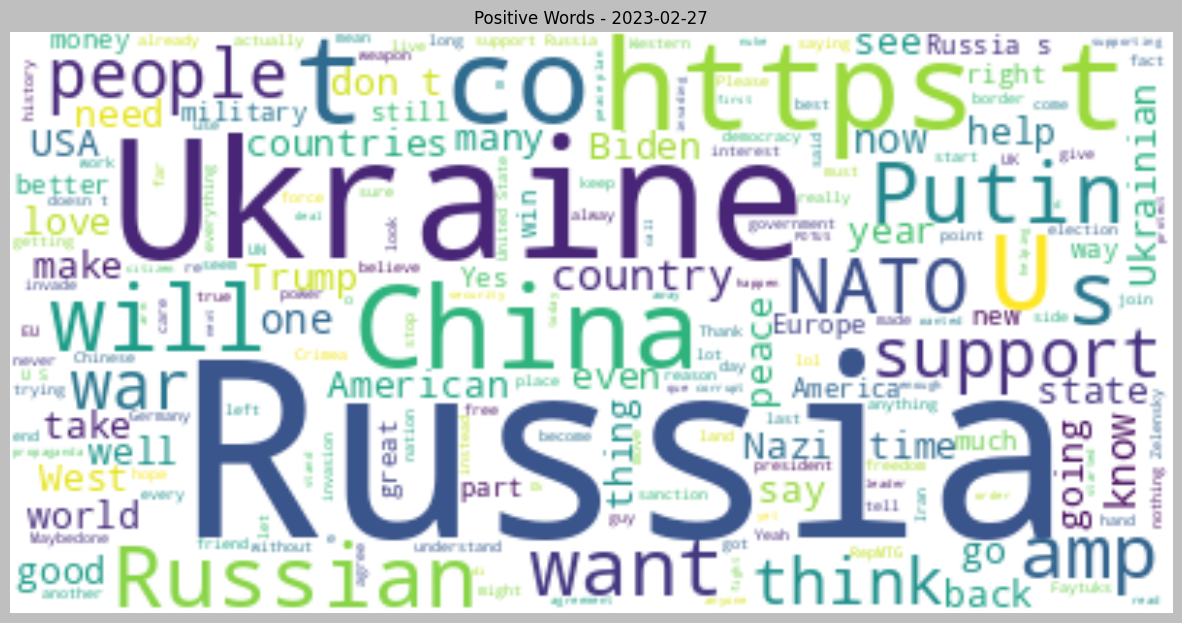

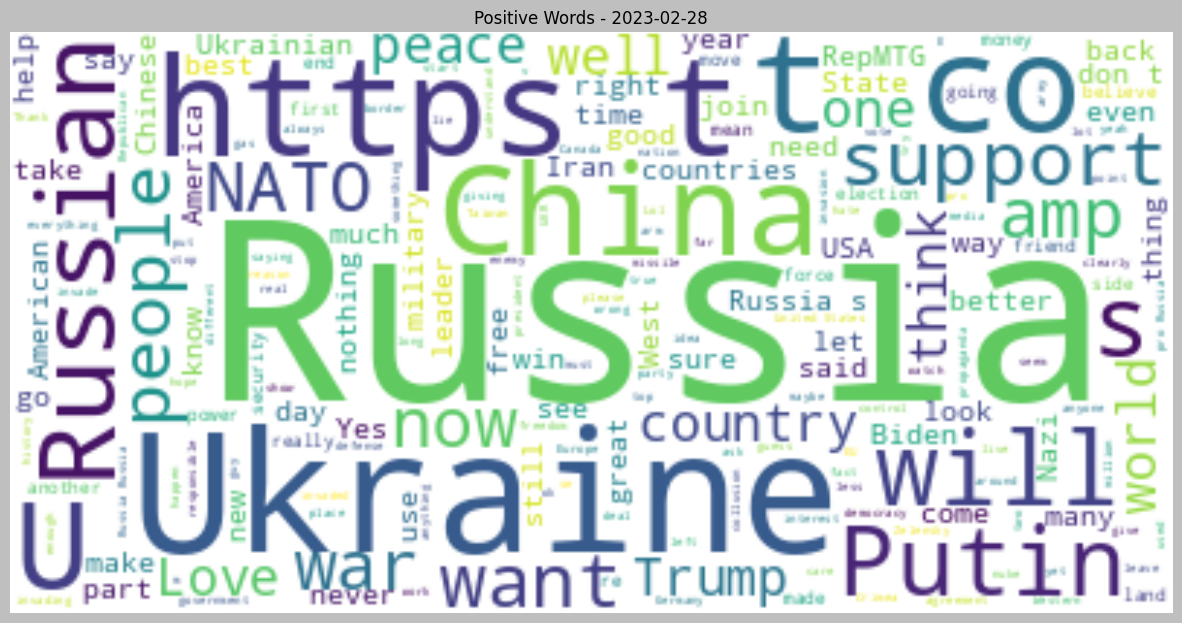

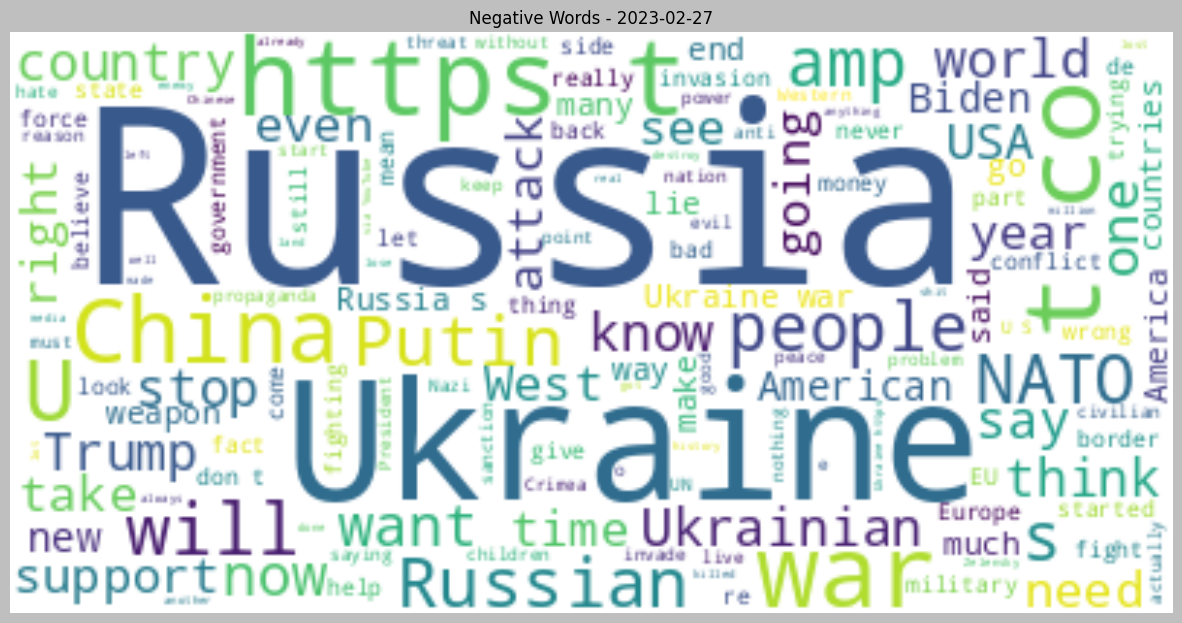

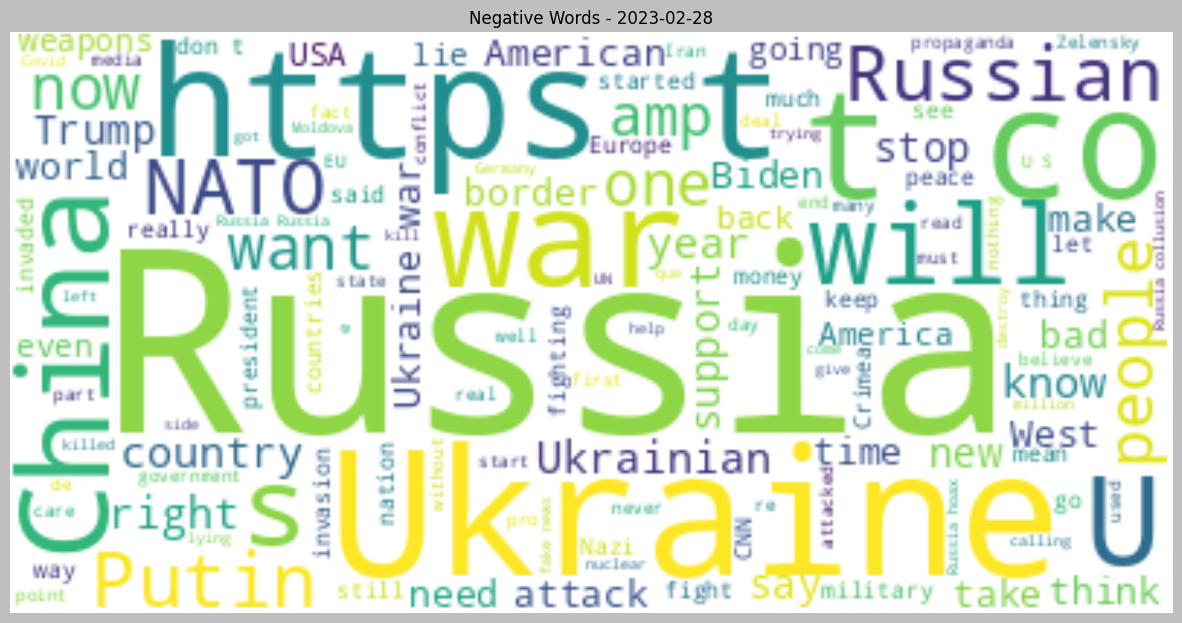

In [ ]:
# defining a function to process tweets and calculate sentiment scores
def process_tweet(tweet):
    # Your existing preprocessing code here
    tweet = tweet.lower()  # Convert to lowercase
    tweet = ''.join([char for char in tweet if char not in string.punctuation])  # Remove punctuation
    tokens = word_tokenize(tweet)  # Tokenization
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    tokens = [stemmer.stem(word) for word in tokens]  # Stemming
    processed_tweet = ' '.join(tokens)  # Join tokens back to sentence
    return processed_tweet


# Then Convert the 'created_at' column to datetime
tweets['created_at'] = pd.to_datetime(tweets['created_at'])

# Create a time-based grouping, i.e., daily
tweets['day'] = tweets['created_at'].dt.date

# Initialize sentiment analyzer
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each tweet
tweets['Positive'] = [sentiments.polarity_scores(i)["pos"] for i in tweets["tweet"]]
tweets['Negative'] = [sentiments.polarity_scores(i)["neg"] for i in tweets["tweet"]]

# Create separate DataFrames for positive and negative tweets
positive_tweets = tweets[tweets['Positive'] > tweets['Negative']]
negative_tweets = tweets[tweets['Negative'] > tweets['Positive']]

# Create word clouds for positive and negative tweets for each day
for day, group in positive_tweets.groupby('day'):
    all_positive_tweets = ' '.join(group['tweet'].tolist())
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(all_positive_tweets)
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Positive Words - {day}')
    plt.show()

for day, group in negative_tweets.groupby('day'):
    all_negative_tweets = ' '.join(group['tweet'].tolist())
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(all_negative_tweets)
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Negative Words - {day}')
    plt.show()


## Other Visualizations:

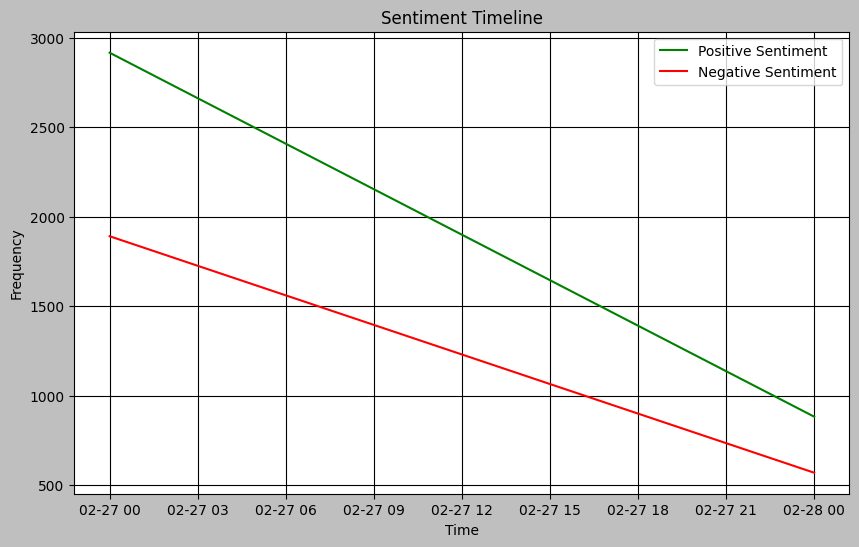

In [ ]:
# bar Graph,
# a function to calculate sentiment polarity (-1 for negative, 1 for positive)
def calculate_sentiment(tweet):
    analysis = TextBlob(tweet)
    return analysis.sentiment.polarity

# Assuming you have a DataFrame 'tweets' with columns: 'tweet' and 'created_at'
# Create a new column for sentiment polarity
tweets['sentiment'] = tweets['tweet'].apply(calculate_sentiment)

# Convert the 'created_at' column to datetime
tweets['created_at'] = pd.to_datetime(tweets['created_at'])

# Define the time intervals (e.g., daily)
time_intervals = pd.date_range(start=tweets['created_at'].min(), end=tweets['created_at'].max(), freq='D')

# Create a line chart for sentiment over time
plt.figure(figsize=(10, 6))
for sentiment_type, color in [('positive', 'g'), ('negative', 'r')]:
    sentiment_counts = tweets[(tweets['sentiment'] > 0) if sentiment_type == 'positive' else (tweets['sentiment'] < 0)]
    sentiment_counts = sentiment_counts.groupby(tweets['created_at'].dt.floor('D')).size()
    plt.plot(sentiment_counts.index, sentiment_counts.values, label=f'{sentiment_type.capitalize()} Sentiment', color=color)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Sentiment Timeline')
plt.legend()
plt.grid()
plt.show()


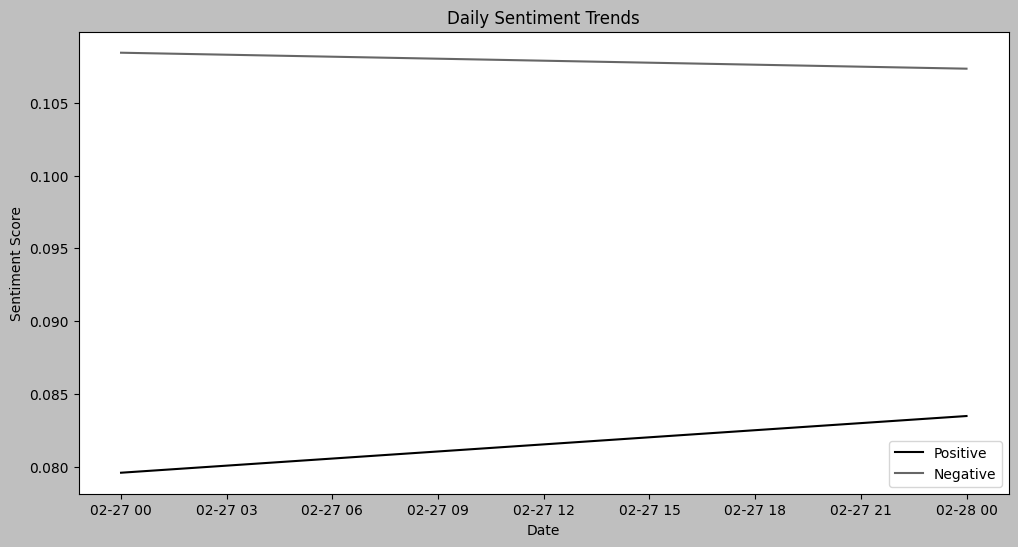

In [ ]:
#Time Series Line Plot: daily sentiment trends
daily_sentiments = tweets.groupby('day')[['Positive', 'Negative']].mean()
daily_sentiments.plot(kind='line', figsize=(12, 6), title='Daily Sentiment Trends')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend(['Positive', 'Negative'])
plt.show()


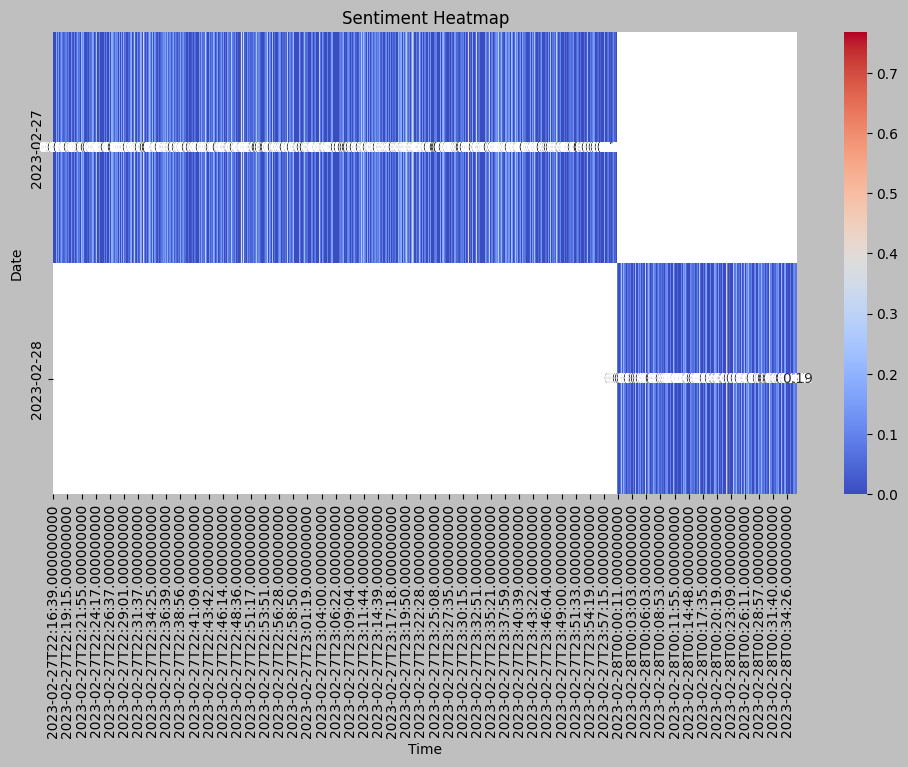

In [ ]:
# Heatmap of sentiment scores by day and time
heatmap_data = tweets.pivot_table(index='day', columns='created_at', values='Positive', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Sentiment Heatmap')
plt.xlabel('Time')
plt.ylabel('Date')
plt.show()


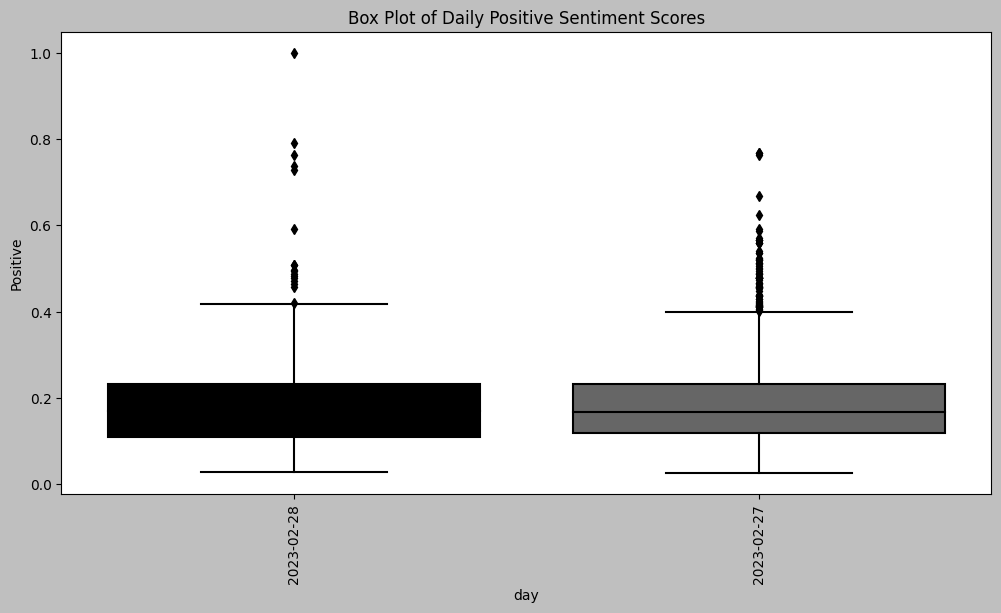

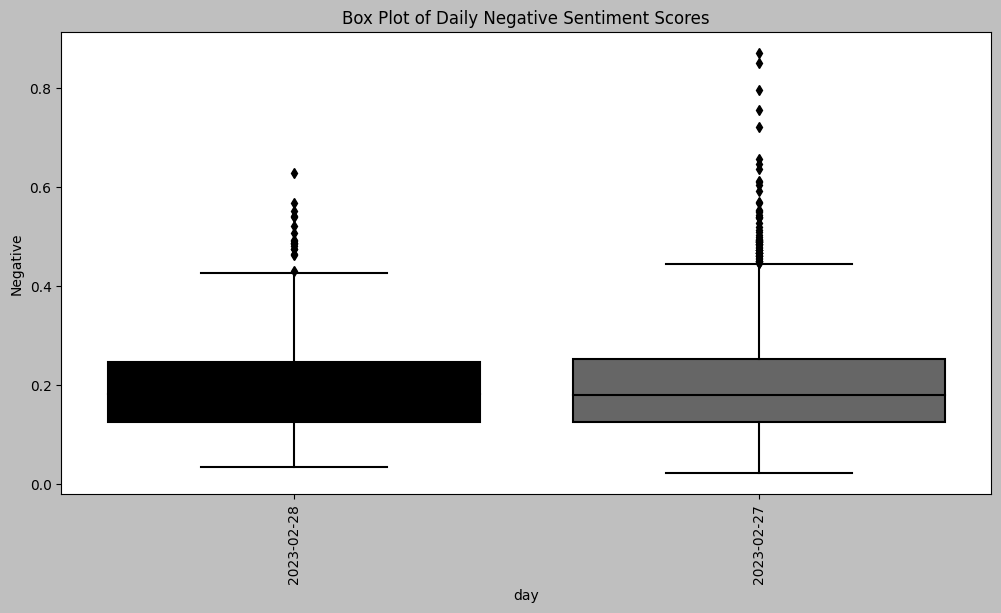

In [ ]:
#Box plots of daily sentiment scores
plt.figure(figsize=(12, 6))
sns.boxplot(x='day', y='Positive', data=positive_tweets)
plt.title('Box Plot of Daily Positive Sentiment Scores')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='day', y='Negative', data=negative_tweets)
plt.title('Box Plot of Daily Negative Sentiment Scores')
plt.xticks(rotation=90)
plt.show()

